In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Optional: For fancy time series distance metrics
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

sns.set(style="whitegrid")


In [11]:
df = pd.read_csv("/Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project/dm2_dataset_2425_imdb/imdb_ts.csv") 

# Controllo rapido
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Columns: 104 entries, id to rating_category
dtypes: float64(101), object(3)
memory usage: 921.5+ KB


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,rating
count,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,...,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1134.000000
mean,9.075217e+06,8.521398e+06,7.954433e+06,7.080579e+06,6.200350e+06,4.567772e+06,2.943717e+06,2.932913e+06,2.929824e+06,2.503033e+06,...,3.173743e+05,2.546920e+05,1.909471e+05,1.804780e+05,1.711978e+05,1.457827e+05,1.192445e+05,1.153249e+05,1.111532e+05,6.584921
std,1.559543e+07,1.366932e+07,1.188300e+07,1.066701e+07,9.596818e+06,7.180084e+06,5.160170e+06,4.787618e+06,4.569201e+06,4.050967e+06,...,6.415705e+05,5.310139e+05,4.772244e+05,4.025968e+05,3.688206e+05,2.941344e+05,2.332032e+05,2.303428e+05,2.333821e+05,0.900217
min,1.266000e+03,2.422000e+03,2.853000e+03,2.947000e+03,3.054000e+03,2.844000e+03,1.940000e+03,1.865000e+03,1.277000e+03,1.449000e+03,...,3.500000e+01,3.500000e+01,1.200000e+01,3.000000e+01,2.200000e+01,2.700000e+01,2.800000e+01,3.600000e+01,8.000000e+00,2.800000
25%,4.618975e+05,4.531445e+05,4.673408e+05,4.031570e+05,3.583830e+05,2.618655e+05,1.592525e+05,1.908358e+05,2.043262e+05,1.841965e+05,...,2.182375e+04,1.651875e+04,9.954500e+03,1.058575e+04,1.100675e+04,1.010200e+04,8.811000e+03,8.601000e+03,8.172000e+03,6.100000
50%,4.025919e+06,4.033458e+06,3.895830e+06,3.517052e+06,2.964305e+06,2.191776e+06,1.181900e+06,1.359742e+06,1.440482e+06,1.179675e+06,...,7.906950e+04,5.739150e+04,3.938500e+04,4.051050e+04,3.979450e+04,3.570550e+04,3.170750e+04,2.986700e+04,2.871100e+04,6.600000
75%,1.001112e+07,9.694290e+06,9.531908e+06,8.363360e+06,7.279080e+06,5.356860e+06,3.211315e+06,3.420557e+06,3.555019e+06,2.948315e+06,...,3.227622e+05,2.504522e+05,1.494638e+05,1.626510e+05,1.647458e+05,1.469250e+05,1.189488e+05,1.151650e+05,1.072790e+05,7.300000
max,1.574616e+08,1.345532e+08,1.092641e+08,9.905818e+07,9.038924e+07,6.824053e+07,5.698972e+07,4.744864e+07,3.736173e+07,3.768914e+07,...,1.103245e+07,8.485023e+06,6.093301e+06,4.575375e+06,5.959033e+06,4.065463e+06,2.168520e+06,2.956294e+06,3.716898e+06,8.700000


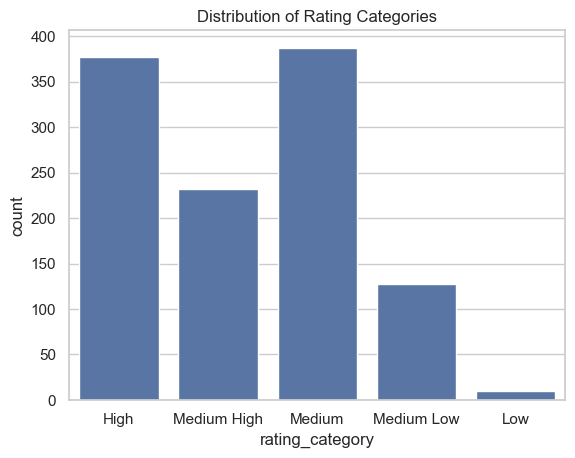

In [12]:
sns.countplot(x='rating_category', data=df)
plt.title("Distribution of Rating Categories")
plt.show()

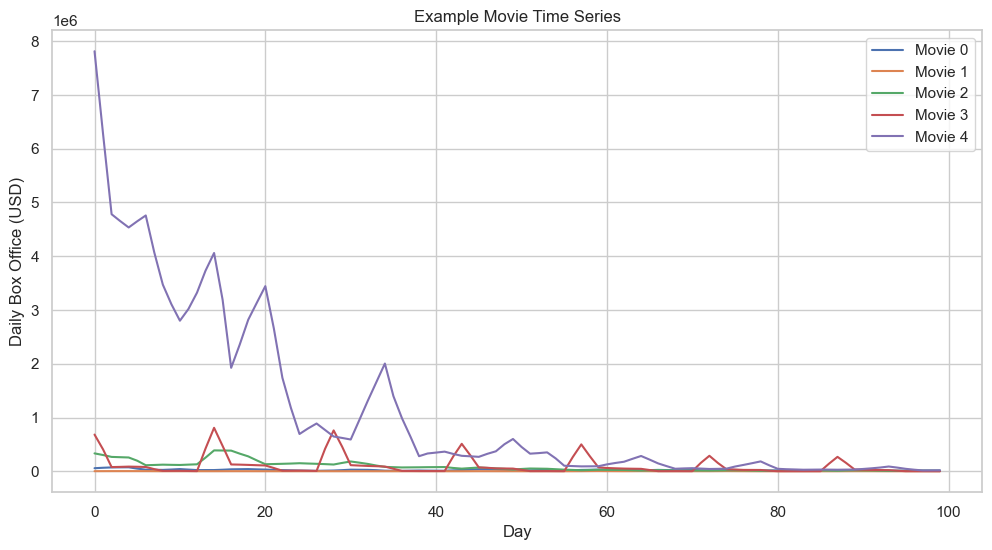

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Selezioniamo solo le colonne numeriche dei giorni, ignorando id o altri string
day_cols = [str(i) for i in range(100)]  # se le colonne sono stringhe "0","1",...
# oppure day_cols = list(range(100)) se sono interi

ts_values = df[day_cols].iloc[:5].to_numpy(dtype=float)

plt.figure(figsize=(12,6))
for i, row in enumerate(ts_values):
    plt.plot(np.arange(100), row, label=f'Movie {i}')
plt.xlabel("Day")
plt.ylabel("Daily Box Office (USD)")
plt.title("Example Movie Time Series")
plt.legend()
plt.show()




In [18]:
df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,1077363.0,1061148.0,1043451.0,912840.0,738595.0,508118.0,296236.0,318113.0,341113.0,...,2396.0,2425.0,2461.0,2223.0,1920.0,1991.0,2051.0,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,56775.0,57750.0,58828.0,53549.0,48484.0,37340.0,19243.0,30804.0,55897.0,...,739.0,618.0,488.0,636.0,883.0,904.0,920.0,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,3595005.0,3401235.0,3221227.0,2645775.0,2188725.0,1681250.0,1030698.0,1138724.0,1290788.0,...,345246.0,257388.0,182883.0,165311.0,144119.0,128009.0,111756.0,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,528167.0,617409.0,696127.0,741481.0,802782.0,527997.0,177249.0,141753.0,100026.0,...,10108.0,10511.0,10878.0,7491.0,3752.0,5237.0,6592.0,7.4,"['Biography', 'Drama', 'History']",High


In [19]:
X_ts = df.iloc[:, 1:100].values  # time series features
y = df['rating_category'].values

In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ts)

In [22]:
# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [23]:
# --- KNN Classifier (base) ---
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [24]:
# --- Predict on Test Set ---
y_pred = knn.predict(X_test)

In [25]:
# --- Classification Report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

        High       0.56      0.60      0.58        75
         Low       0.00      0.00      0.00         2
      Medium       0.49      0.62      0.55        78
 Medium High       0.21      0.15      0.17        46
  Medium Low       0.43      0.23      0.30        26

    accuracy                           0.47       227
   macro avg       0.34      0.32      0.32       227
weighted avg       0.44      0.47      0.45       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


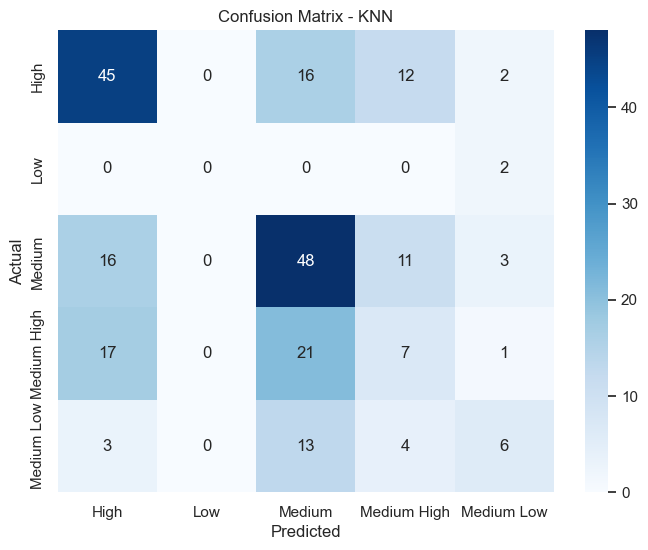

In [26]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best CV Accuracy: 0.4685629287839232

Classification Report - Best KNN:

              precision    recall  f1-score   support

        High       0.68      0.69      0.68        75
         Low       0.00      0.00      0.00         2
      Medium       0.50      0.72      0.59        78
 Medium High       0.35      0.20      0.25        46
  Medium Low       0.55      0.23      0.32        26

    accuracy                           0.54       227
   macro avg       0.41      0.37      0.37       227
weighted avg       0.53      0.54      0.52       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


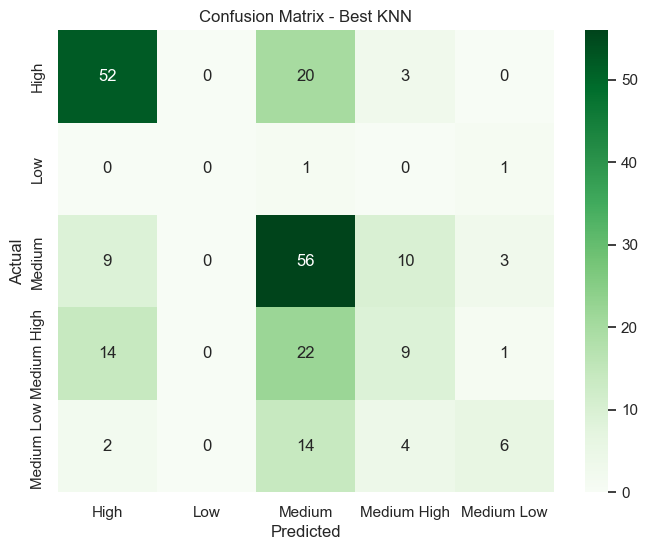

In [27]:
from sklearn.model_selection import GridSearchCV

# --- Parametri da testare ---
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# --- Grid Search ---
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# --- Risultati ---
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# --- Predizione con modello migliore ---
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("\nClassification Report - Best KNN:\n")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best KNN")
plt.show()


Classification Report - KNN DTW:

              precision    recall  f1-score   support

        High       0.47      0.67      0.55        75
         Low       0.00      0.00      0.00         2
      Medium       0.49      0.56      0.53        78
 Medium High       0.20      0.11      0.14        46
  Medium Low       0.57      0.15      0.24        26

    accuracy                           0.45       227
   macro avg       0.35      0.30      0.29       227
weighted avg       0.43      0.45      0.42       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


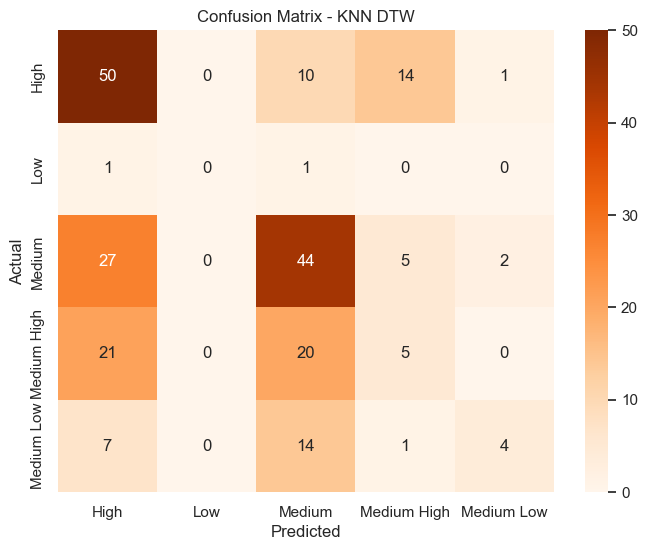

In [28]:
# Se non l'hai già installato:
# !pip install tslearn

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

# --- Prepara i dati per tslearn ---
# tslearn vuole array 3D: (n_samples, n_timesteps, n_features)
X_ts_3d = X_ts.reshape((X_ts.shape[0], X_ts.shape[1], 1))

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_ts_3d, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- Scala le serie ---
scaler_ts = TimeSeriesScalerMeanVariance()
X_train_scaled = scaler_ts.fit_transform(X_train_ts)
X_test_scaled = scaler_ts.transform(X_test_ts)

# --- KNN con DTW ---
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train_scaled, y_train_ts)

# --- Predizione ---
y_pred_dtw = knn_dtw.predict(X_test_scaled)

# --- Valutazione ---
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report - KNN DTW:\n")
print(classification_report(y_test_ts, y_pred_dtw, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_ts, y_pred_dtw)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN DTW")
plt.show()


In [29]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

# KNN con DTW + Sakoe-Chiba band (w=7 giorni)
knn_dtw_band = KNeighborsTimeSeriesClassifier(
    n_neighbors=3,
    metric="dtw",
    metric_params={"global_constraint": "sakoe_chiba", "sakoe_chiba_radius": 7}
)

knn_dtw_band.fit(X_train_scaled, y_train_ts)
y_pred_band = knn_dtw_band.predict(X_test_scaled)


Classification Report - KNN DTW with Sakoe-Chiba (w=7):

              precision    recall  f1-score   support

        High       0.46      0.67      0.55        75
         Low       0.00      0.00      0.00         2
      Medium       0.49      0.58      0.53        78
 Medium High       0.24      0.11      0.15        46
  Medium Low       0.50      0.12      0.19        26

    accuracy                           0.45       227
   macro avg       0.34      0.29      0.28       227
weighted avg       0.43      0.45      0.41       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


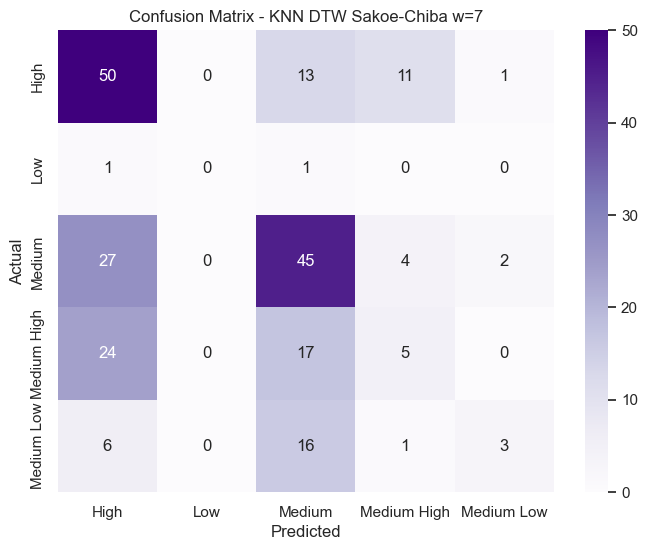

In [30]:
# --- Predict ---
y_pred_band = knn_dtw_band.predict(X_test_scaled)

# --- Valutazione ---
print("Classification Report - KNN DTW with Sakoe-Chiba (w=7):\n")
print(classification_report(y_test_ts, y_pred_band, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_ts, y_pred_band)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN DTW Sakoe-Chiba w=7")
plt.show()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best CV Balanced Accuracy: 0.3270377004440296

Classification Report - Best KNN:

              precision    recall  f1-score   support

        High       0.61      0.57      0.59        75
         Low       0.00      0.00      0.00         2
      Medium       0.49      0.63      0.55        78
 Medium High       0.33      0.28      0.30        46
  Medium Low       0.44      0.31      0.36        26

    accuracy                           0.50       227
   macro avg       0.38      0.36      0.36       227
weighted avg       0.49      0.50      0.49       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


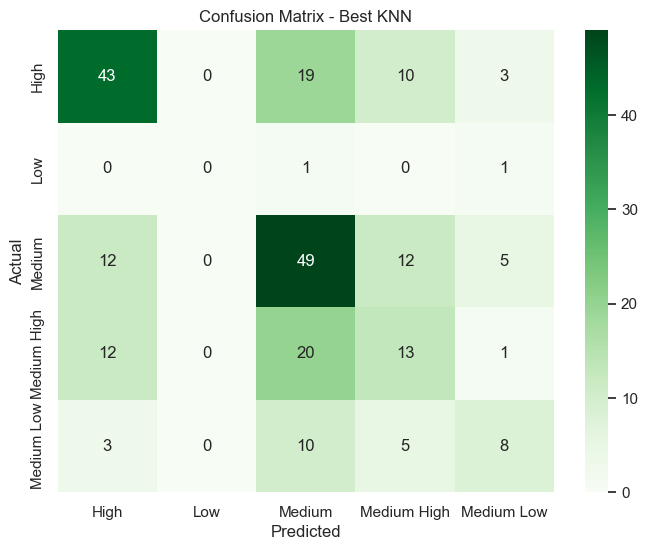

In [34]:
from sklearn.model_selection import GridSearchCV

# --- Parametri da testare ---
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# --- Grid Search ---
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# --- Risultati ---
print("Best Parameters:", grid.best_params_)
print("Best CV Balanced Accuracy:", grid.best_score_)

# --- Predizione con modello migliore ---
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

print("\nClassification Report - Best KNN:\n")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best KNN")
plt.show()

In [37]:
X_log = np.log1p(X_ts)  # log(1+x) per evitare log(0)


In [38]:
# Smoothing con rolling mean su ciascuna serie
X_smoothed = np.array([
    pd.Series(x).rolling(window=3, min_periods=1, center=True).mean().values
    for x in X_log
])

In [39]:
# Scaling individuale (media 0, varianza 1)
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_smoothed)

# --- 2️⃣ Definizione del target ---
y = df['rating_category'].values

# --- 3️⃣ Creazione del classificatore KNN DTW ---
knn_dtw = KNeighborsTimeSeriesClassifier(
    n_neighbors=7,
    metric="dtw",
    metric_params={"sakoe_chiba_radius":7},  # banda di Sakoe-Chiba
    weights="distance"
)


In [40]:
# --- 4️⃣ Split train/test (esempio semplice, puoi usare cross-validation) ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5️⃣ Fit e valutazione ---
knn_dtw.fit(X_train, y_train)
y_pred = knn_dtw.predict(X_test)

from sklearn.metrics import classification_report, balanced_accuracy_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Balanced Accuracy: 0.28960981047937573
              precision    recall  f1-score   support

        High       0.55      0.53      0.54        75
         Low       0.00      0.00      0.00         2
      Medium       0.39      0.54      0.45        78
 Medium High       0.35      0.26      0.30        46
  Medium Low       0.25      0.12      0.16        26

    accuracy                           0.43       227
   macro avg       0.31      0.29      0.29       227
weighted avg       0.41      0.43      0.41       227



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Medium Low + Low

Balanced Accuracy: 0.39369644847905716
               precision    recall  f1-score   support

         High       0.48      0.52      0.50        75
Low_MediumLow       0.29      0.14      0.19        28
       Medium       0.45      0.56      0.50        78
  Medium High       0.47      0.35      0.40        46

     accuracy                           0.45       227
    macro avg       0.42      0.39      0.40       227
 weighted avg       0.44      0.45      0.44       227



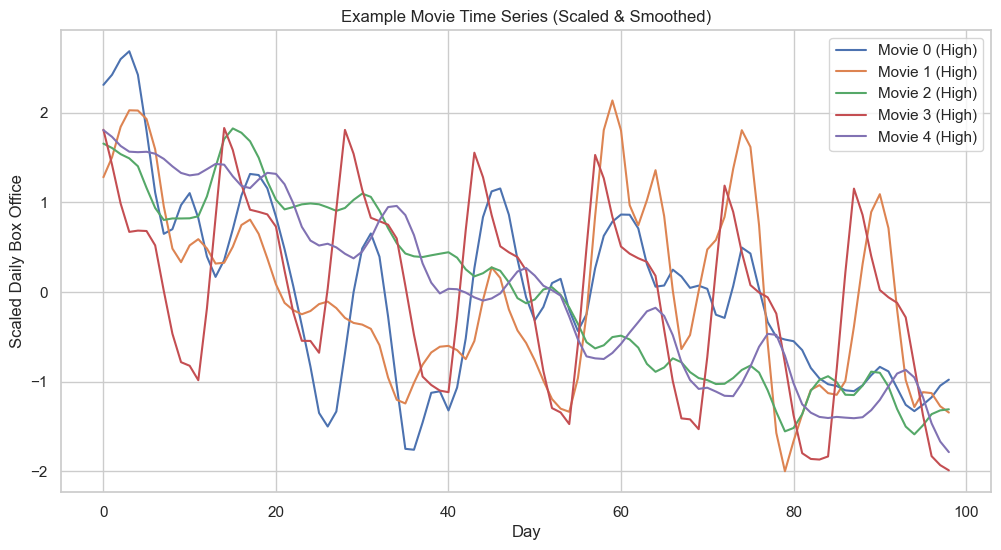

In [43]:
import numpy as np
import pandas as pd
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt

# ----------------------------
# 1️⃣ Preprocessing delle serie
# ----------------------------

# Seleziona solo le colonne 0-99 delle serie
X_ts = df.iloc[:, 1:100].values  

# Nuovo target combinato: uniamo Low e Medium Low
y_combined = np.where(np.isin(df['rating_category'], ['Low', 'Medium Low']),
                      'Low_MediumLow',
                      df['rating_category'])

# Log-transform per ridurre i picchi
X_log = np.log1p(X_ts)

# Smoothing con rolling mean (window=3)
X_smoothed = np.array([
    pd.Series(x).rolling(window=3, min_periods=1, center=True).mean().values
    for x in X_log
])

# Scaling individuale (media 0, varianza 1)
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_smoothed)

# ----------------------------
# 2️⃣ Split train/test
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

# ----------------------------
# 3️⃣ KNN DTW con Sakoe-Chiba band
# ----------------------------
knn_dtw = KNeighborsTimeSeriesClassifier(
    n_neighbors=7,
    metric="dtw",
    metric_params={"sakoe_chiba_radius":7},  
    weights="distance"
)

# Fit
knn_dtw.fit(X_train, y_train)
y_pred = knn_dtw.predict(X_test)

# ----------------------------
# 4️⃣ Valutazione
# ----------------------------
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ----------------------------
# 5️⃣ (Opzionale) Visualizzazione di alcune serie
# ----------------------------
plt.figure(figsize=(12,6))
for i in range(5):
    plt.plot(X_scaled[i].ravel(), label=f'Movie {i} ({y_combined[i]})')
plt.xlabel("Day")
plt.ylabel("Scaled Daily Box Office")
plt.title("Example Movie Time Series (Scaled & Smoothed)")
plt.legend()
plt.show()


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
import numpy as np

# Definizione dei parametri
param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Modello base
knn = KNeighborsTimeSeriesClassifier(
    metric="dtw",
    metric_params={"sakoe_chiba_radius": 7}
)

# RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=4,  # quante combinazioni random testare (puoi aumentare se vuoi)
    scoring='balanced_accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit
rand_search.fit(X_train, y_train)

print("Migliori parametri:", rand_search.best_params_)
print("Best CV balanced accuracy:", rand_search.best_score_)



KeyboardInterrupt: 

In [47]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

# ----------------------------
# 1️⃣ Sottocampionamento del train set
# ----------------------------
# prendi solo il 30% del train per velocizzare la ricerca
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train, 
    train_size=0.3, 
    stratify=y_train, 
    random_state=42
)

# ----------------------------
# 2️⃣ Definizione del modello base
# ----------------------------
knn = KNeighborsTimeSeriesClassifier(
    metric="dtw", 
    metric_params={"sakoe_chiba_radius": 7}
)

# ----------------------------
# 3️⃣ RandomizedSearch leggero
# ----------------------------
param_dist = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

rand_search = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=4,             # 4 configurazioni random
    cv=2,                 # riduciamo a 2 fold per velocità
    scoring="balanced_accuracy",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_search.fit(X_sub, y_sub)

print("Migliori parametri (subset):", rand_search.best_params_)
print("Balanced Accuracy (subset CV):", rand_search.best_score_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Migliori parametri (subset): {'weights': 'uniform', 'n_neighbors': 3}
Balanced Accuracy (subset CV): 0.32350591928877626


# Evaluation of preprocessing step by step

In [48]:
def preprocess_series(X, variant="raw", smooth_window=3):
    X_proc = X.copy()
    
    if "log" in variant:
        X_proc = np.log1p(X_proc)
    
    if "smooth" in variant:
        X_proc = np.array([
            pd.Series(x).rolling(window=smooth_window, min_periods=1, center=True).mean().values
            for x in X_proc
        ])
        
    if "scale" in variant:
        scaler = TimeSeriesScalerMeanVariance()
        X_proc = scaler.fit_transform(X_proc)
        
    return X_proc


In [49]:
n_neighbors = 3

In [50]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report

def evaluate_knn_dtw(X, y, n_neighbors=7, sakoe_chiba_radius=7):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    knn = KNeighborsTimeSeriesClassifier(
        n_neighbors=n_neighbors,
        metric="dtw",
        metric_params={"sakoe_chiba_radius": sakoe_chiba_radius},
        weights="distance"
    )
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    return bal_acc, report


In [51]:
variants = ["raw", "log", "smooth", "scale", "log+smooth", "log+smooth+scale"]
results = {}

for var in variants:
    X_proc = preprocess_series(X_ts, variant=var)
    bal_acc, report = evaluate_knn_dtw(X_proc, y)
    results[var] = {"balanced_accuracy": bal_acc, "report": report}
    
for var, res in results.items():
    print(f"=== Variant: {var} ===")
    print("Balanced Accuracy:", res["balanced_accuracy"])
    print(res["report"])


=== Variant: raw ===
Balanced Accuracy: 0.3039509476031215
              precision    recall  f1-score   support

        High       0.50      0.43      0.46        75
         Low       0.00      0.00      0.00         2
      Medium       0.48      0.67      0.56        78
 Medium High       0.21      0.20      0.20        46
  Medium Low       0.50      0.23      0.32        26

    accuracy                           0.44       227
   macro avg       0.34      0.30      0.31       227
weighted avg       0.43      0.44      0.42       227

=== Variant: log ===
Balanced Accuracy: 0.32967224080267554
              precision    recall  f1-score   support

        High       0.62      0.64      0.63        75
         Low       0.00      0.00      0.00         2
      Medium       0.47      0.58      0.52        78
 Medium High       0.35      0.24      0.29        46
  Medium Low       0.22      0.19      0.20        26

    accuracy                           0.48       227
   macro avg